In [1]:
import pandas as pd

## Import Datasets

In [2]:
df=pd.read_csv(r"H:\DA\Project\netflix\netflix.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.shape

(7787, 12)

In [5]:
df.size

93444

In [6]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
df.drop('release_year',axis=1,inplace=True)

In [10]:
df.columns=['ShowID','Category','Title','Director','Cast','Country','Release_Date','Rating','Duration','Type','Description']

In [11]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


## Check Duplicate Record

In [12]:
df[df.duplicated()]

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


## Drop Duplicate Records

In [13]:
df.drop_duplicates(inplace=True)

## Check null values

In [14]:
df.isnull().sum()

ShowID             0
Category           0
Title              0
Director        2389
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [15]:
import seaborn as sns

<Axes: >

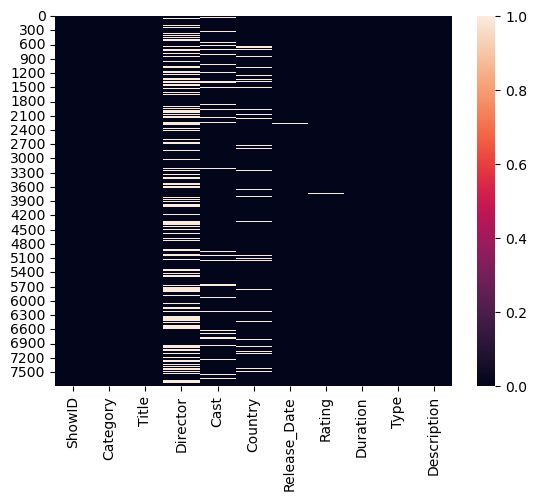

In [16]:
sns.heatmap(df.isnull())

## 1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?

In [17]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [18]:
df[df.Title=='House of Cards']

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [19]:
df[df.Title.isin(['House of Cards'])]

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [20]:
df[df.Title.str.contains('House of Cards')]

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


## 2) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

In [21]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [22]:
df.dtypes

ShowID          object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [23]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])

In [24]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [25]:
df.dtypes

ShowID                  object
Category                object
Title                   object
Director                object
Cast                    object
Country                 object
Release_Date    datetime64[ns]
Rating                  object
Duration                object
Type                    object
Description             object
dtype: object

In [26]:
df['Release_Date'].dt.year.value_counts()

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: Release_Date, dtype: int64

<Axes: >

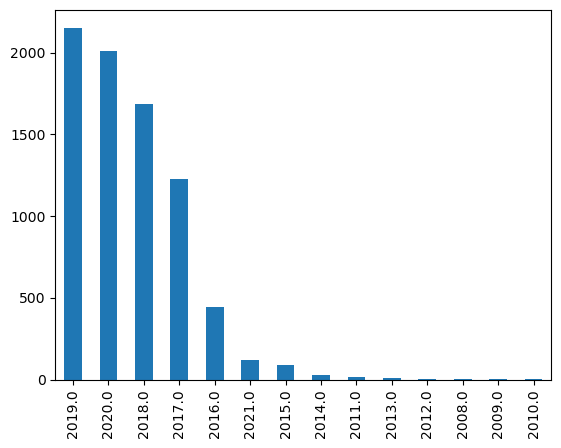

In [27]:
df['Release_Date'].dt.year.value_counts().plot(kind='bar')

## 3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.

In [28]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


### .groupby()

In [29]:
df.groupby('Category').Category.count()

Category
Movie      5377
TV Show    2410
Name: Category, dtype: int64

### .value_counts()

In [30]:
df.Category.value_counts()

Movie      5377
TV Show    2410
Name: Category, dtype: int64

### pandas bar graph

<Axes: >

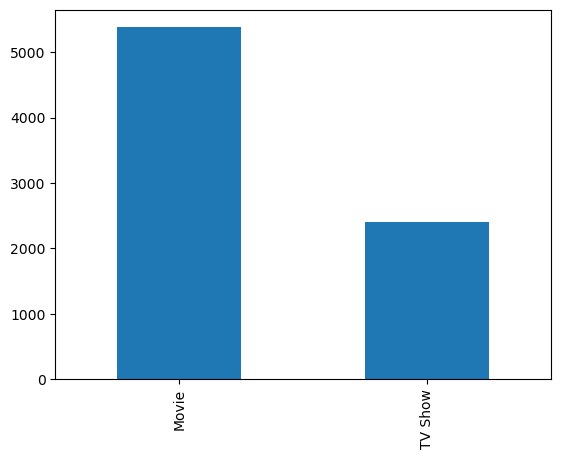

In [31]:
df.Category.value_counts().plot(kind='bar')

### seaborn bar graph

<Axes: >

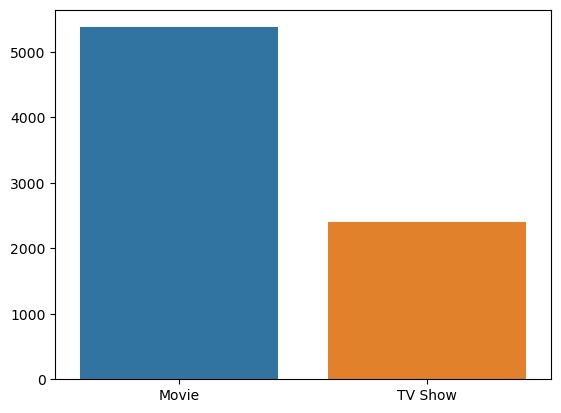

In [32]:
sns.barplot(x=df.Category.value_counts().index,y=df.Category.value_counts().values)

## 4) Show all the Movies that were released in year 2012.

In [33]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [34]:
df[(df.Category=='Movie')&(df.Release_Date.dt.year==2012)]

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
818,s819,Movie,Being Elmo: A Puppeteer's Journey,Constance Marks,"Kevin Clash, Whoopi Goldberg",United States,2012-02-21,PG,76 min,Documentaries,Whoopi Goldberg narrates Elmo creator Kevin Cl...
1229,s1230,Movie,Casa de mi Padre,Matt Piedmont,"Will Ferrell, Gael García Bernal, Diego Luna, ...","United States, Mexico",2012-11-14,R,84 min,Comedies,Will Ferrell stars as a Spanish-speaking cowbo...
3466,s3467,Movie,Kung Fu Panda: Holiday,Tim Johnson,"Jack Black, Angelina Jolie, Dustin Hoffman, Ja...",United States,2012-12-01,TV-PG,26 min,"Children & Family Movies, Comedies","As preparations for the Winter Feast build, Po..."


## 5) Show only the Titles of all TV Shows that were released in India only.

In [35]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [36]:
df[(df.Category=='TV Show')&(df.Country=='India')].Title

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6248                  The Creative Indians
6398    The Golden Years with Javed Akhtar
6467                The House That Made Me
7292                            Typewriter
7703                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

## 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [37]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [38]:
df.Director.value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Ryan Polito                8
Name: Director, dtype: int64

## 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

In [39]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [40]:
df[((df.Category=='Movie')&(df.Type=='Comedies'))|(df.Country=='United Kingdom')]

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,2019-11-01,TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist..."
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik..."
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,2018-12-20,TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...
...,...,...,...,...,...,...,...,...,...,...,...
7668,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,2017-08-01,TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...
7669,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,2019-02-01,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali..."
7686,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,2020-03-18,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc..."
7723,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,2017-12-31,TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...


##  8) In how many movies/shows, Tom Cruise was cast ?

In [41]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [42]:
df.shape

(7787, 11)

In [43]:
df1=df.dropna(subset=['Cast'],axis=0)

In [44]:
df1.shape

(7069, 11)

In [45]:
df1[df1.Cast.str.contains('Tom Cruise')]

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and..."
5070,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...


## 9) What are the different Ratings defined by Netflix ?

In [46]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [47]:
df.Rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

## 9.1) How many Movies got the 'TV-14' rating, in Canada ?

In [48]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [49]:
df[(df.Category=='Movie')&(df.Rating=='TV-14')&(df.Country=='Canada')].shape

(11, 11)

## 9.2) How many TV Shows got the 'R' rating, after year 2018 ?

In [50]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [51]:
df[(df.Category=='TV Show')&(df.Rating=='R')&(df.Release_Date.dt.year>2018)].shape

(1, 11)

## 10) What is the maximum duration of a Movie/Show on Netflix ?

In [52]:
df.head(2)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [53]:
df[['Duration_N','Duration_Unit']]=df.Duration.str.split(' ',expand=True)

In [54]:
df.head(2)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_N,Duration_Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,Seasons
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93,min


In [55]:
df.Duration_N.dtypes

dtype('O')

In [56]:
df.Duration_N=df.Duration_N.astype(int)

In [57]:
df.Duration_N.max()

312

## 11) Which individual country has the Highest No. of TV Shows ?

In [58]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_N,Duration_Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,Seasons


In [59]:
df[(df.Category=='TV Show')].Country.value_counts().head(1)

United States    705
Name: Country, dtype: int64

## 12) How can we sort the dataset by Year ?

In [60]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_N,Duration_Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,Seasons


In [61]:
df.sort_values(by='Release_Date',ascending=False)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_N,Duration_Unit
1673,s1674,Movie,Death of Me,Darren Lynn Bousman,"Maggie Q, Luke Hemsworth, Alex Essoe, Ingkarat...","United States, Thailand",2021-01-16,R,94 min,Horror Movies,"With no memory of the previous night, a vacati...",94,min
205,s206,Movie,A Monster Calls,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...","United Kingdom, Spain, United States",2021-01-16,PG-13,108 min,"Dramas, Sci-Fi & Fantasy","Overwhelmed by his mother’s illness, a young b...",108,min
5059,s5060,Movie,Radium Girls,"Lydia Dean Pilcher, Ginny Mohler","Joey King, Abby Quinn, Cara Seymour, Scott She...",United States,2021-01-16,TV-14,103 min,"Dramas, Independent Movies",When the women at a radium factory begin to fa...,103,min
7220,s7221,Movie,Tribhanga - Tedhi Medhi Crazy,Renuka Shahane,"Kajol, Tanvi Azmi, Mithila Palkar, Kunaal Roy ...",NaN,2021-01-15,TV-MA,96 min,"Dramas, International Movies","When her estranged mother falls into a coma, a...",96,min
980,s981,TV Show,Bling Empire,NaN,NaN,NaN,2021-01-15,TV-MA,1 Season,Reality TV,Follow LA's wildly wealthy Asian and Asian Ame...,1,Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,2,Seasons
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",3,Seasons
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",4,Seasons
5137,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",13,Seasons


## 13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.

In [62]:
df.head(1)

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_N,Duration_Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,Seasons


In [63]:
df[((df.Category=='Movie')&(df.Type=='Dramas'))|((df.Category=='TV Show')&(df.Type=="Kids' TV"))]

,ShowID,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_N,Duration_Unit
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123,min
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,119,min
111,s112,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,2020-10-01,TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2,Seasons
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States",2019-12-15,R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,110,min
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,2011-10-01,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",95,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,s7667,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States",2017-06-16,TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th...",2,Seasons
7715,s7716,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,2018-06-23,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",1,Season
7717,s7718,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,2018-06-07,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",1,Season
7756,s7757,TV Show,Z4,NaN,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,2019-02-22,TV-PG,2 Seasons,Kids' TV,Fading music biz veteran Zé realizes he has ju...,2,Seasons


## 

---

---

---

---

---